In [2]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pylab import rcParams

# change default figsize 
plt.rcParams['figure.figsize'] = (15, 12)

Rivers/Streams Data Source: [USA Detailed Streams](http://edu-esriroedu.opendata.arcgis.com/datasets/3428672decd64aeabcb8da15e9b749f0_0)

In [3]:
rivers_raw = gpd.read_file('USA_Detailed_Streams/USA_Detailed_Streams.shp')

In [4]:
us_states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

In [5]:
rivers_raw.head()

,OBJECTID,NAME,FTYPE,FCODE,FCODE_DESC,STRM_LEVEL,AP_WITHIN,METERS,FEET,geometry
0,6676,Mart Davis Creek,Stream/River,46006,Stream/River: Hydrographic Category = Perennial,3,None,1729,5660,"LINESTRING (-124.09084800271 43.3939851681619,..."
1,6677,East Creek,Stream/River,46006,Stream/River: Hydrographic Category = Perennial,2,None,2701,8842,"LINESTRING (-123.96892450373 43.4130819934604,..."
2,6678,West Creek,Stream/River,46006,Stream/River: Hydrographic Category = Perennial,2,None,2582,8452,LINESTRING (-123.983352944232 43.4085458750957...
3,6679,Big Creek,Stream/River,46006,Stream/River: Hydrographic Category = Perennial,2,None,2703,8849,"LINESTRING (-123.91914136324 43.3947641822438,..."
4,6680,Big Creek,Stream/River,46006,Stream/River: Hydrographic Category = Perennial,2,None,1441,4717,LINESTRING (-123.948400575596 43.3926620009253...


#### check the line width

In [9]:
plt.rcParams['lines.linewidth']

1.5

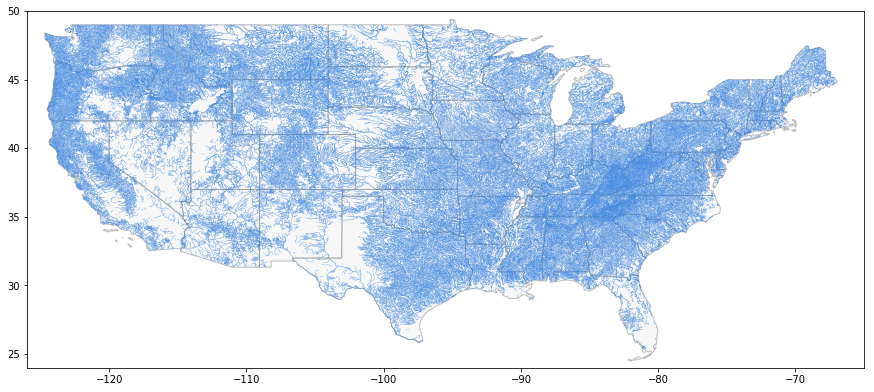

In [30]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

us_states.plot(ax=ax, edgecolor='gray', alpha=0.5, color=base_color)
rivers_raw.plot(ax=ax, color=line_color, linewidth=0.3, zorder=1);
#
ax.set(xlim=(-126,-65), ylim=(24,50));

#### Thats alot of water! 

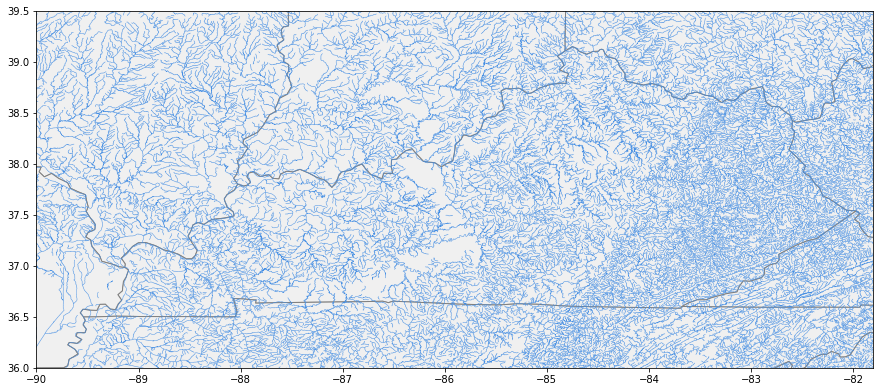

In [20]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

us_states.plot(ax=ax, edgecolor='gray', color=base_color)
rivers_raw.plot(ax=ax, color=line_color, linewidth=0.5, zorder=1);

ax.set(xlim=(-90,-81.8), ylim=(36,39.5));

#### Color the various type - FCODES

In [44]:
missi_river = rivers_raw.loc[rivers_raw['NAME'] == 'Mississippi River']
print(missi_river['FCODE'].unique())
print(missi_river['FCODE_DESC'].unique())
limit_fcodes = [55800, 46006]
missi_limit = missi_river.loc[missi_river['FCODE'].isin(limit_fcodes)]

[55800 46006 33400 33600]
['Artificial Path' 'Stream/River: Hydrographic Category = Perennial'
 'Connector' 'Canal/Ditch']


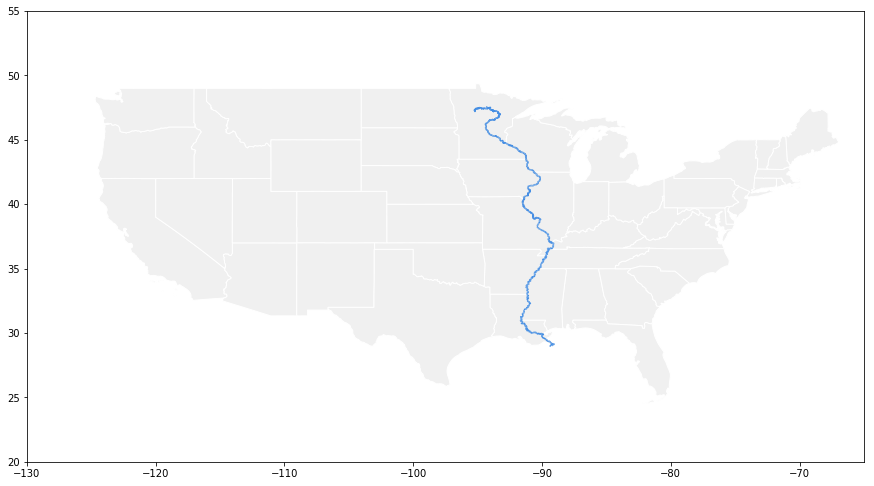

In [45]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

us_states.plot(ax=ax, edgecolor='white', color=base_color)
#missi_river.plot(ax=ax, color=line_color, zorder=1);
missi_limit.plot(ax=ax, color=line_color, zorder=1);

ax.set(xlim=(-130,-65), ylim=(20,55));

In [29]:
print('Rivers CRS =', rivers_raw.crs)
print('US States CRS =', us_states.crs)

Rivers CRS = {'init': 'epsg:4326'}
US States CRS = {'init': 'epsg:4269'}


#### *** Trivial difference in CRS, be aware some operations using GeoPandas or Shapely may require they be the same.

In [26]:
rivers_raw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1067918 entries, 0 to 1067917
Data columns (total 10 columns):
OBJECTID      1067918 non-null int64
NAME          1067918 non-null object
FTYPE         1067918 non-null object
FCODE         1067918 non-null int64
FCODE_DESC    1067918 non-null object
STRM_LEVEL    1067918 non-null int64
AP_WITHIN     179292 non-null object
METERS        1067918 non-null int64
FEET          1067918 non-null int64
geometry      1067918 non-null object
dtypes: int64(5), object(5)
memory usage: 81.5+ MB


In [31]:
rivers_raw['FTYPE'].unique()

array(['Stream/River', 'Artificial Path', 'Canal/Ditch', 'Connector',
       'Pipeline'], dtype=object)

In [28]:
rivers_raw['FTYPE'].nunique()
rivers_raw['FTYPE'].value_counts()

Stream/River       862294
Artificial Path    190042
Canal/Ditch          7838
Connector            7652
Pipeline               92
Name: FTYPE, dtype: int64

In [46]:
rivers_raw['FCODE'].unique()

array([46006, 46003, 55800, 33600, 33400, 42803, 42809, 42801, 42813,
       33601], dtype=int64)

In [89]:
rivers_raw['FCODE_DESC'].unique()

array(['Stream/River: Hydrographic Category = Perennial',
       'Stream/River: Hydrographic Category = Intermittent',
       'Artificial Path', 'Canal/Ditch', 'Connector',
       'Pipeline: Pipeline Type = Aqueduct; Relationship to Surface',
       'Pipeline: Pipeline Type = Penstock; Relationship to Surface',
       'Pipeline: Pipeline Type = Siphon',
       'Canal/Ditch: Canal/Ditch Type = Aqueduct'], dtype=object)

In [90]:
rivers_raw['AP_WITHIN'].unique()

array([None, 'Stream/River', 'Lake/Pond', 'Reservoir', 'Swamp/Marsh',
       'Inundation Area', 'Ice Mass', 'Playa', 'Canal/Ditch'],
      dtype=object)

#### Determine if there are unique FCODEs for the FCODE_DESC values

In [38]:
unique_fcode = rivers_raw['FCODE_DESC'].unique()
print (unique_fcode[1] + '\n', rivers_raw['FCODE'].loc[rivers_raw['FCODE_DESC'] == unique_fcode[1]].unique())
for index, code in enumerate(unique_fcode):
    print(unique_fcode[index], rivers_raw['FCODE'].loc[rivers_raw['FCODE_DESC'] == unique_fcode[index]].unique())


Stream/River: Hydrographic Category = Intermittent
 [46003]
Stream/River: Hydrographic Category = Perennial [46006]
Stream/River: Hydrographic Category = Intermittent [46003]
Artificial Path [55800]
Canal/Ditch [33600]
Connector [33400]
Pipeline: Pipeline Type = Aqueduct; Relationship to Surface [42803 42801]
Pipeline: Pipeline Type = Penstock; Relationship to Surface [42809]
Pipeline: Pipeline Type = Siphon [42813]
Canal/Ditch: Canal/Ditch Type = Aqueduct [33601]


Does not look like there are unique codes to match with the values.  

#### Limit the data on:
`Stream/River: Hydrographic Category = Perennial [46006]` __AND__ `Artificial Path [55800]`  
Artificial Path gets the whole rivers that are also boundaries. For example, Mississippi and Ohio are not complete as 46006 but adding 

In [46]:
limit_fcodes = [46006,55800]
limit_fcodes = [33400, 33600]
rivers = rivers_raw.loc[rivers_raw['FCODE'].isin(limit_fcodes)]

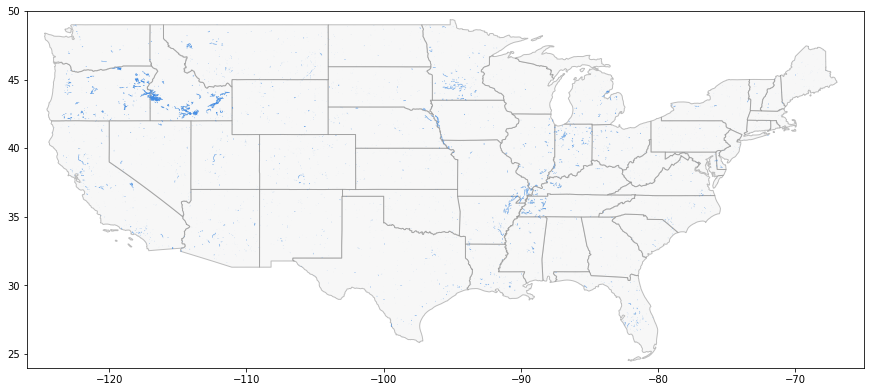

In [47]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

us_states.plot(ax=ax, edgecolor='gray', alpha=0.5, color=base_color)
rivers.plot(ax=ax, color=line_color, linewidth=0.5, zorder=1);
#
ax.set(xlim=(-126,-65), ylim=(24,50));

#### Are major rivers still whole?

In [140]:
missi_river = rivers.loc[rivers_raw['NAME'] == 'Mississippi River']

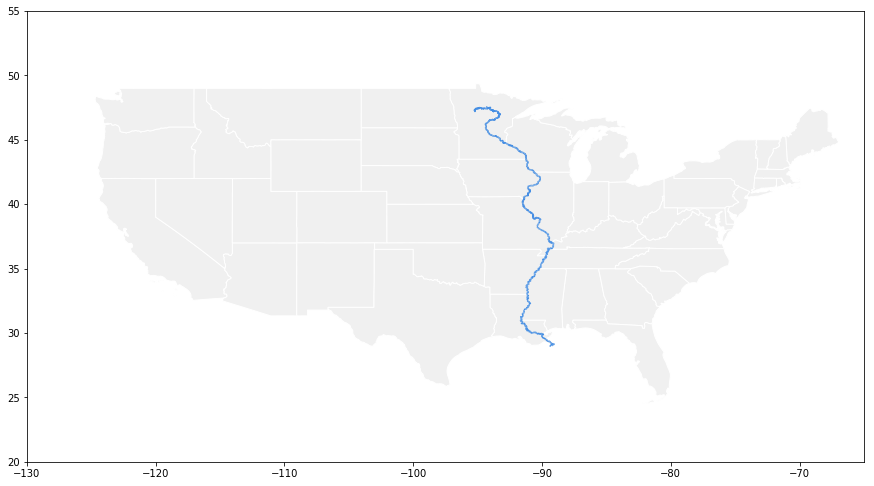

In [141]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

us_states.plot(ax=ax, edgecolor='white', color=base_color)
missi_river.plot(ax=ax, color=line_color, zorder=1);

ax.set(xlim=(-130,-65), ylim=(20,55));

In [142]:
ohio_river = rivers.loc[rivers_raw['NAME'] == 'Ohio River']

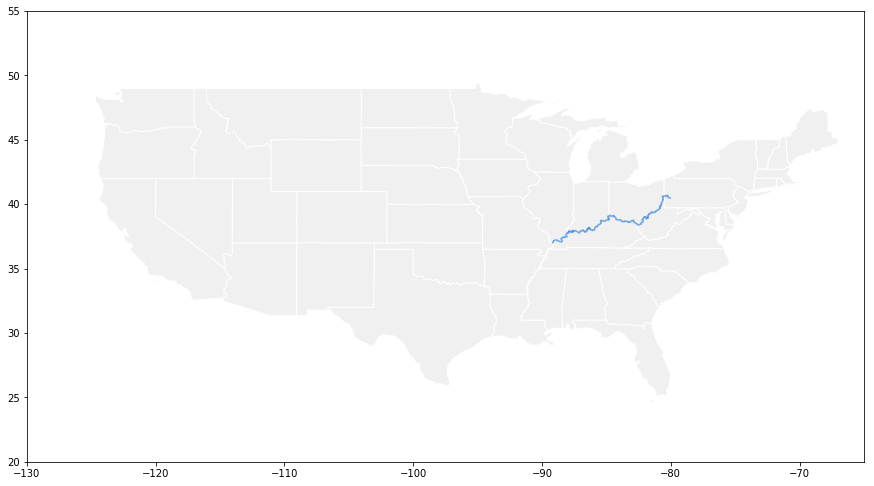

In [143]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

us_states.plot(ax=ax, edgecolor='white', color=base_color)
ohio_river.plot(ax=ax, color=line_color, zorder=1);

ax.set(xlim=(-130,-65), ylim=(20,55));

***
## V O L C A N O E S

Data Source: [EarthWorks](https://earthworks.stanford.edu/catalog/harvard-glb-volc)

Table data on [US volcanoes](https://www.ngdc.noaa.gov/nndc/struts/results?type_0=Like&query_0=&op_8=eq&v_8=United+States&type_10=EXACT&query_10=None+Selected&le_2=&ge_3=&le_3=&ge_2=&op_5=eq&v_5=&op_6=eq&v_6=&op_7=eq&v_7=&t=102557&s=5&d=5)

## Idea for volcano mapping:
http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/

In [52]:
volcano_raw = gpd.read_file('data/harvard-glb-volc-geojson.json')

In [55]:
volcano_raw.crs

{'init': 'epsg:4326'}

In [53]:
volcano_raw.head()

,id,NUMBER_,NAME_,LOCATION,LAT,LON,ELEV,TYPE_,STATUS,TIME_FRAME,geometry
0,SDE.GLB_VOLC.1,0100-01-,WEST EIFE,Germany,50.17,6.85,600,Maars,Radiocarb,D7,POINT (6.852063075609196 50.16904742413753)
1,SDE.GLB_VOLC.2,0100-02-,CHAINE DE,France,45.50,2.75,1464,Cinder co,Radiocarb,D7,POINT (2.751910664839786 45.49918956155233)
2,SDE.GLB_VOLC.3,0100-03-,OLOT VOLC,Spain,42.17,2.53,893,Pyroclast,Holocene?,?,POINT (2.531822578303288 42.16927831943619)
3,SDE.GLB_VOLC.4,0101-001,LARDERELL,Italy,43.25,10.87,500,Explosion,Historica,D6,POINT (10.87183449238631 43.24913342262625)
4,SDE.GLB_VOLC.5,0101-002,AMIATA,Italy,42.90,11.63,1738,Lava dome,Pleistoce,Q,POINT (11.63182254364439 42.89913361947947)


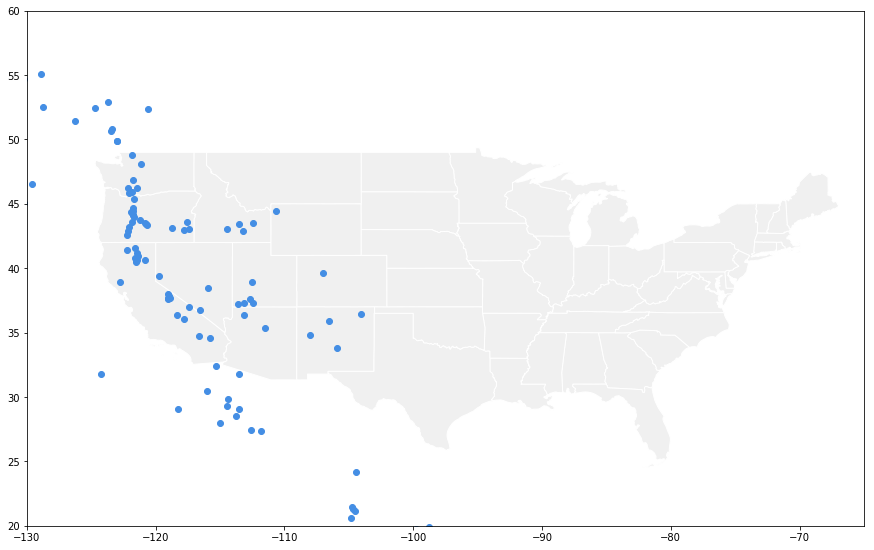

In [54]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color
line_color = '#448ee4'

us_states.plot(ax=ax, edgecolor='white', color=base_color)
volcano_raw.plot(ax=ax, color=line_color, zorder=1);

ax.set(xlim=(-130,-65), ylim=(20,60));

In [27]:
ocean_raw = gpd.read_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_ocean.geojson')
graticule_raw = gpd.read_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_graticules_15.geojson')
land_raw =  gpd.read_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_land.geojson')
pop_places_raw = gpd.read_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places.geojson')

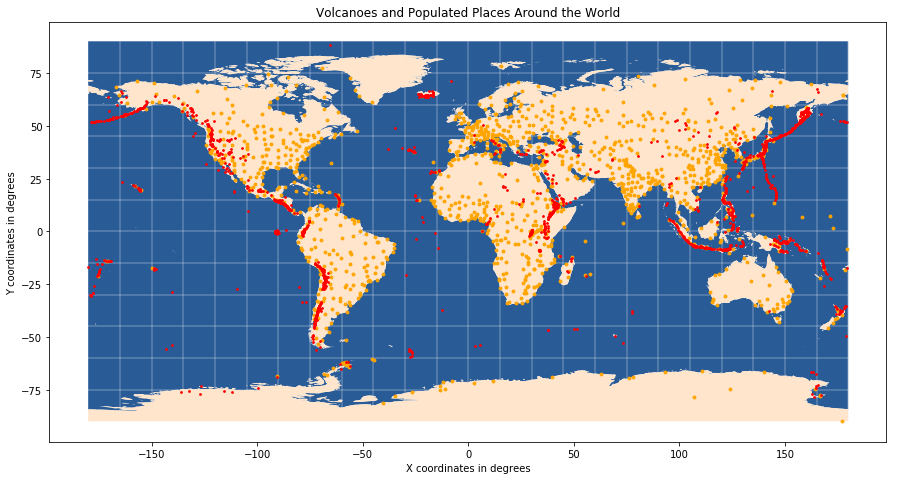

In [29]:
fig, ax = plt.subplots()

base_color = '#f0f0f0'
border_color = base_color

ocean_raw.plot(ax=ax, color='#295b97', zorder=0);
graticule_raw.plot(ax=ax, color='#f2f2f2', zorder=1, linewidth=.4);
land_raw.plot(ax=ax, color='#ffe5cb', zorder=2);
pop_places_raw.plot(ax=ax, color='orange', zorder=3, markersize=8);

volcano_raw.plot(ax=ax, color='red', zorder=4, markersize=3);

ax.set(title="Volcanoes and Populated Places Around the World", 
       xlabel="X coordinates in degrees",
       ylabel="Y coordinates in degrees");